In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re



In [269]:

def make_plots_each_algorithm(df_path):
    
    
    df = pd.read_csv(df_path)


    columns = list(df.columns)
    # conf_mat_cols = [col for col in columns if col.split("-")[1] in ['TP','TN','FP','FN']]
    # confusion matrix value we not need for now
    # df = df[(df["Score"] < 1) & (df['Score'] != 0)]

    df = df[df['Metrics'].apply(lambda x: False if x.split("-")[1] in ['TP','TN','FP','FN'] else True)]


    return df
    # round
    df['Score'] = round(df['Score'],2)


    return df


    # return df

    
    algorithms = df['Algorithm'].unique().tolist()
    imbalance_mets = df['Imbalance'].unique().tolist()

    
    
    for algorithm in algorithms:

        
        alg_df = df[df['Algorithm']==algorithm].copy()
        return alg_df
        
    
    print(algorithms)

In [270]:
df = make_plots_each_algorithm("../src/results/first_attempt_result.csv")

In [271]:
df

,Algorithm,ImputerNum,ImputerCat,Imbalance,Metrics,Score
0,LogisticRegression,SimpleImputer_mean,SimpleImputer_mode,SMOTE,Train-F-1,0.974418
1,DecisionTree,SimpleImputer_mean,SimpleImputer_mode,SMOTE,Train-F-1,1.000000
2,NaiveBayes,SimpleImputer_mean,SimpleImputer_mode,SMOTE,Train-F-1,0.932072
3,KNN,SimpleImputer_mean,SimpleImputer_mode,SMOTE,Train-F-1,0.981898
4,SVM,SimpleImputer_mean,SimpleImputer_mode,SMOTE,Train-F-1,0.983152
...,...,...,...,...,...,...
265,LogisticRegression,SimpleImputer_mean,SimpleImputer_mode,OriginalData,Test-Precision,0.971330
266,DecisionTree,SimpleImputer_mean,SimpleImputer_mode,OriginalData,Test-Precision,0.969558
267,NaiveBayes,SimpleImputer_mean,SimpleImputer_mode,OriginalData,Test-Precision,0.954681
268,KNN,SimpleImputer_mean,SimpleImputer_mode,OriginalData,Test-Precision,0.954366


In [272]:
df.groupby("Algorithm")['Metrics'].count()

Algorithm
DecisionTree          30
KNN                   30
LogisticRegression    30
NaiveBayes            30
SVM                   30
Name: Metrics, dtype: int64

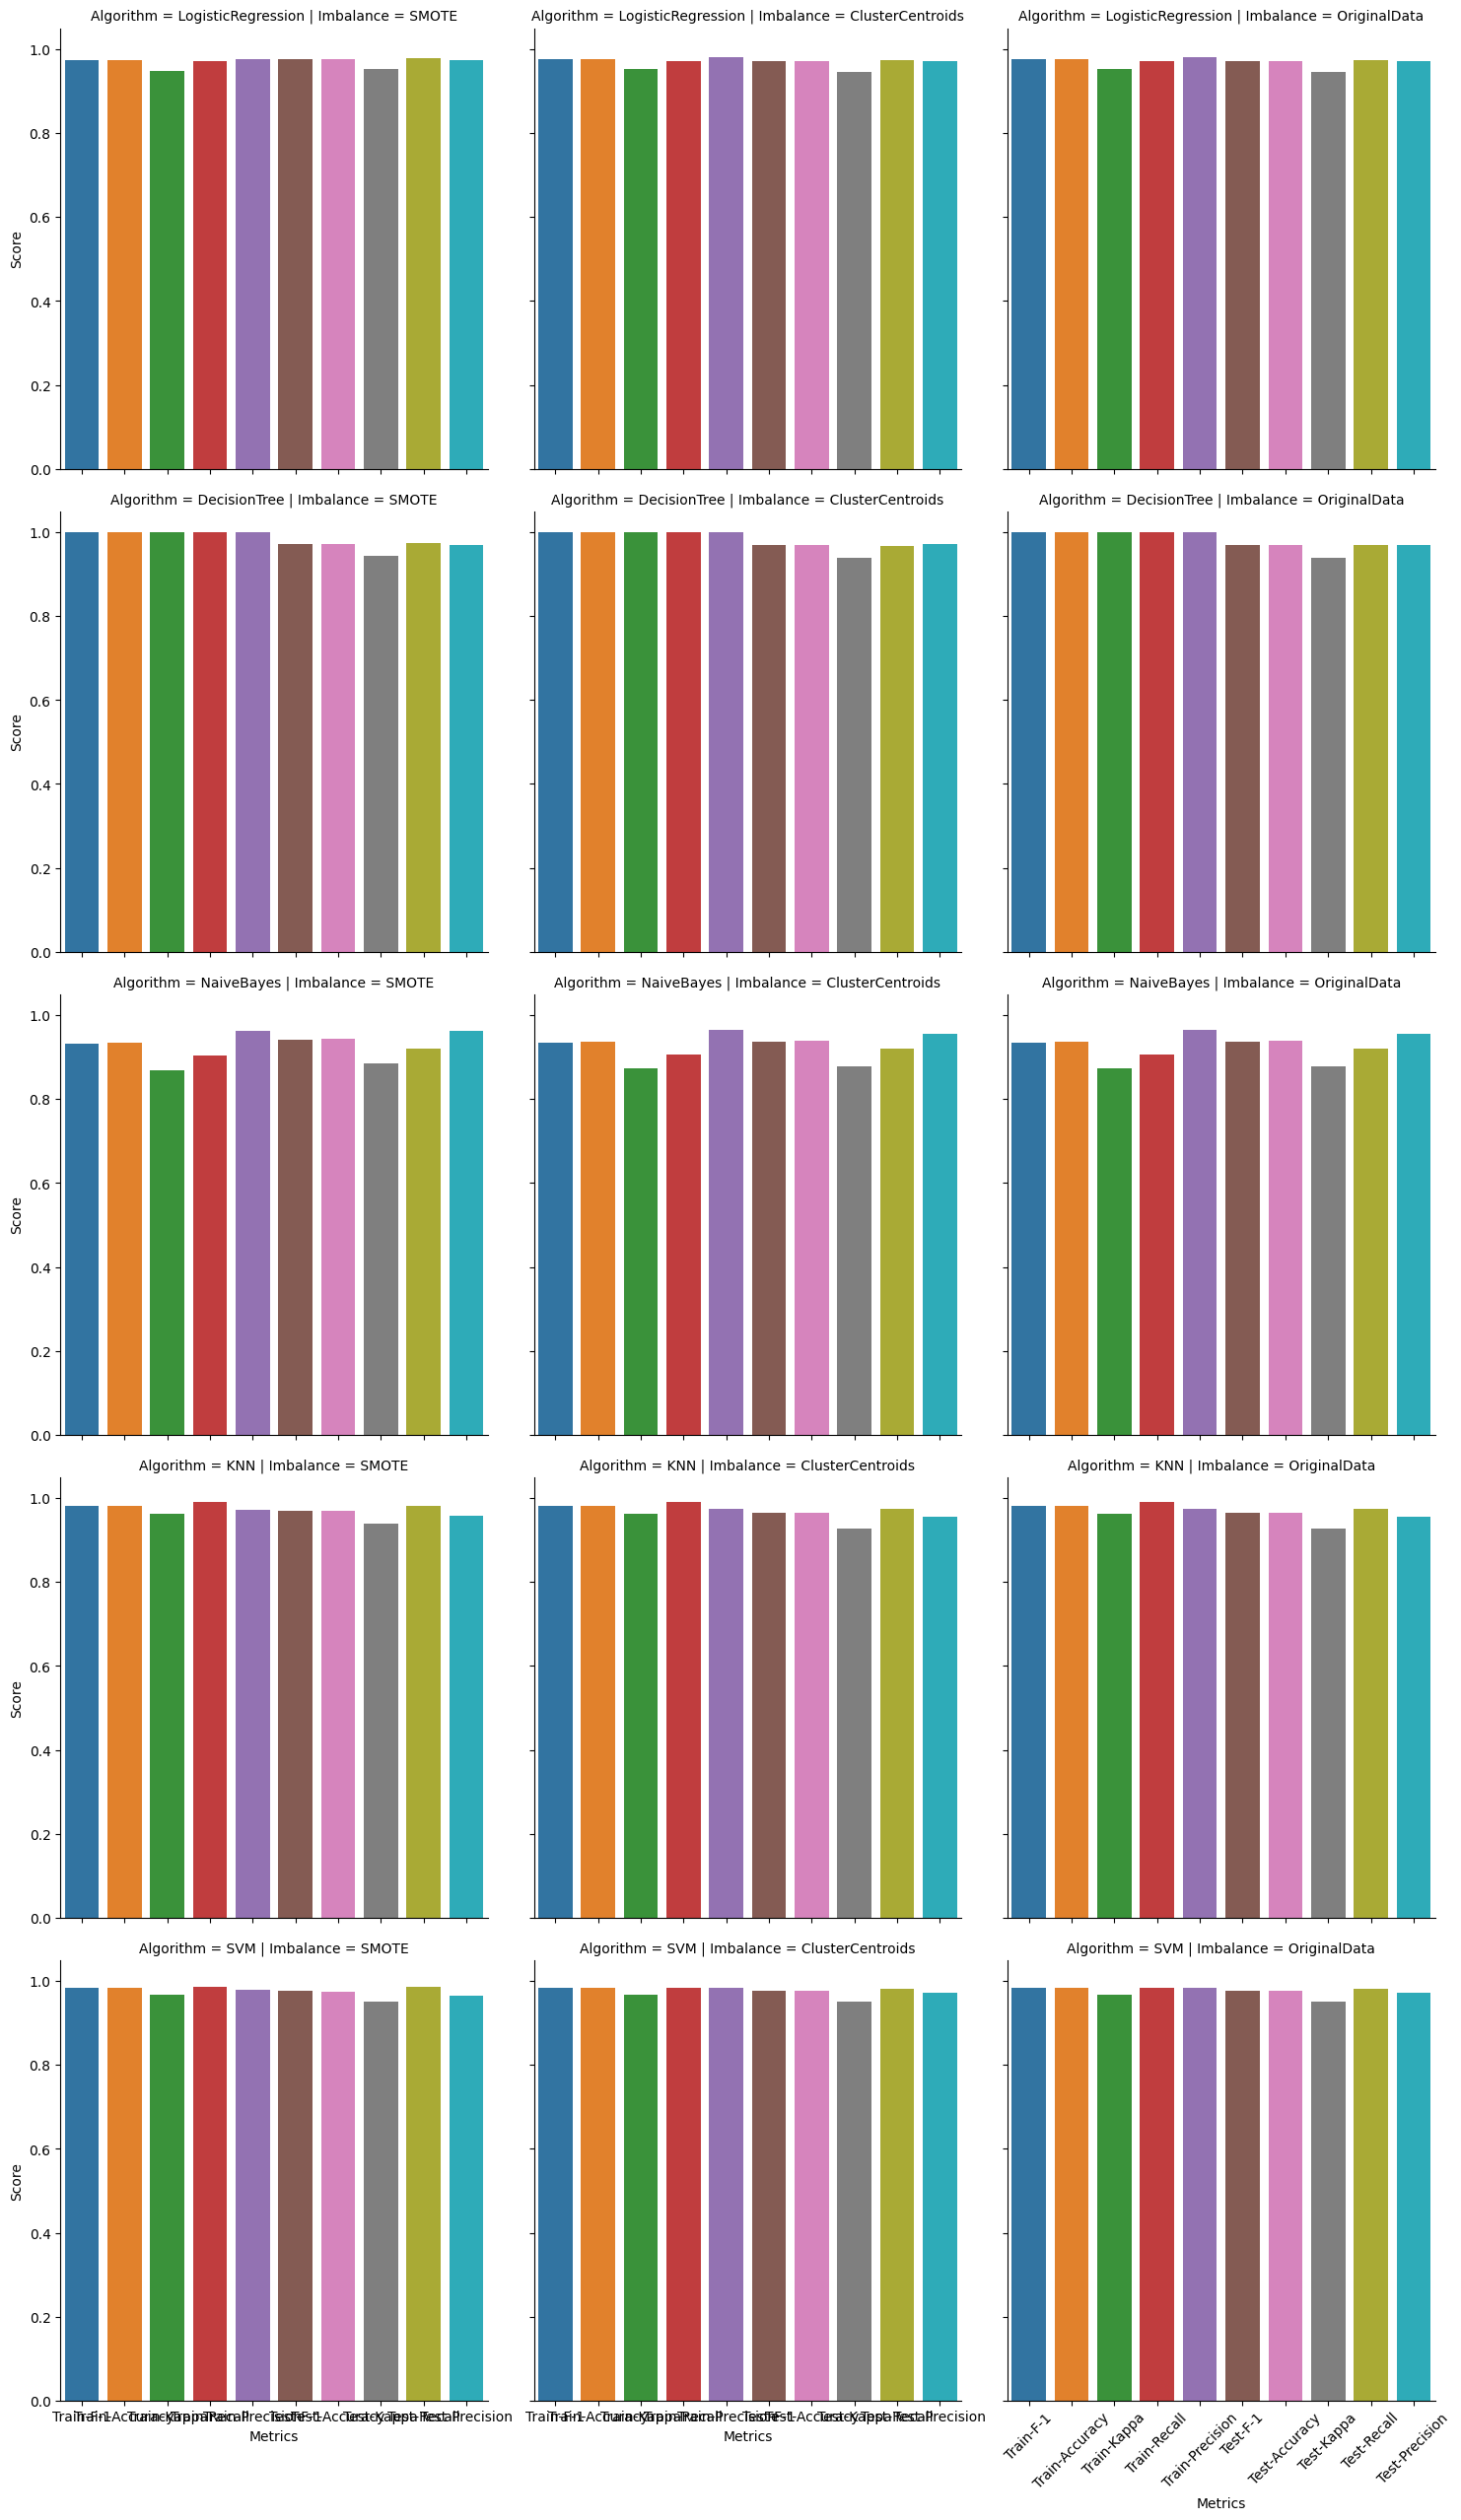

In [273]:
sns.catplot(df,x='Metrics',y='Score',kind='bar',row='Algorithm',col='Imbalance',hue='Metrics')

plt.xticks(rotation=45)
plt.show()

In [139]:
df

,ImputerNum,ImputerCat,Imbalance,Algorithm,Train-F-1,Train-Accuracy,Train-Kappa,Train-TP,Train-FP,Train-TN,...,Train-Precision,Test-F-1,Test-Accuracy,Test-Kappa,Test-TP,Test-FP,Test-TN,Test-FN,Test-Recall,Test-Precision
0,SimpleImputer,SimpleImputer,SMOTE,LogisticRegression,0.976547,0.976476,0.952953,1957,46,1945,...,0.977034,0.967546,0.968,0.935987,477,16,491,16,0.967546,0.967546
1,SimpleImputer,SimpleImputer,SMOTE,DecisionTree,1.000000,1.000000,1.000000,2005,0,1991,...,1.000000,0.972477,0.973,0.945982,477,11,496,16,0.967546,0.977459
2,SimpleImputer,SimpleImputer,SMOTE,NaiveBayes,0.945528,0.946196,0.892403,1866,76,1915,...,0.960865,0.933884,0.936,0.871910,452,23,484,41,0.916836,0.951579
3,SimpleImputer,SimpleImputer,SMOTE,KNN,0.977396,0.976977,0.953949,1989,76,1915,...,0.963196,0.964215,0.964,0.928026,485,28,479,8,0.983773,0.945419
4,SimpleImputer,SimpleImputer,SMOTE,SVM,0.987110,0.986987,0.973973,1991,38,1953,...,0.981272,0.971831,0.972,0.944002,483,18,489,10,0.979716,0.964072
5,SimpleImputer,SimpleImputer,ClusterCentroids,LogisticRegression,0.975889,0.975726,0.951451,1963,62,1936,...,0.969383,0.975272,0.975,0.950000,493,18,482,7,0.986000,0.964775
6,SimpleImputer,SimpleImputer,ClusterCentroids,DecisionTree,1.000000,1.000000,1.000000,1998,0,1998,...,1.000000,0.967488,0.967,0.934000,491,24,476,9,0.982000,0.953398
7,SimpleImputer,SimpleImputer,ClusterCentroids,NaiveBayes,0.943511,0.944444,0.888889,1854,78,1920,...,0.959627,0.937564,0.939,0.878000,458,19,481,42,0.916000,0.960168
8,SimpleImputer,SimpleImputer,ClusterCentroids,KNN,0.980489,0.980230,0.960460,1985,66,1932,...,0.967821,0.964637,0.964,0.928000,491,27,473,9,0.982000,0.947876
9,SimpleImputer,SimpleImputer,ClusterCentroids,SVM,0.986077,0.985986,0.971972,1983,41,1957,...,0.979743,0.976285,0.976,0.952000,494,18,482,6,0.988000,0.964844
